In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import optimize
import pandas as pd
i = 20
#switching latex fonts
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": 'fantasy',
#     "font.fantasy": ['Arial', 'Times New Roman', 'Tahoma']})
plt.rcParams.update({
    "figure.figsize": (16, 10)
})

# необходимые функции

def err_pres_formatter(value, error):
    """Rounds value and it's error according to scientific conventions"""
    first_digit = (np.array(error/10**np.floor(np.log10(error)), dtype="int"))
    first_digit_position = np.array(np.floor(np.log10(error)), dtype="int")
    ndigits = 1
    if first_digit == 1:
        ndigits += 1
    return round(value, -first_digit_position + ndigits-1), round(error, -first_digit_position + ndigits-1)

def lower_upper_limits(domain, fun, popt, err, nsigma=1):
    '''Вычисляет минимальные и максимальные значения функции 
    при заданных парамерах и стандартных отклонениях
    в пределах nsigma*стандартное отклонение
    Возвращает:
    minA :(np.array) - массив минимальных значений
    maxA :(np.array) - массив максимальных значений'''
    deviations = np.eye(popt.size)*np.expand_dims(err, 1)
    df = np.expand_dims(f(domain, *popt), 1) - f(np.expand_dims(X, 1), *(np.expand_dims(popt, 1)+np.eye(popt.size)*np.expand_dims(err, 1)))
    sigm_f = np.sqrt(np.sum(df**2, 1))
    return f(domain, *popt)-nsigma*sigm_f, f(domain, *popt)+nsigma*sigm_f 

In [2]:
#ВВод данных
x = np.array([
256.0,361.0,484.0,625.0,784.0,961.0,1156.0,1521.0,1764.0,2025.0,2304.0,169.0
])-1000
y = np.array([
40.474485,44.28800000000001,48.672000000000004,53.59786801199999,59.56816728,66.195521388,73.25249903999999,86.71392784400001,95.503225823,105.05186009,115.60976497600001,36.62553387599999
])
xerr = np.array([
32.0,38.0,44.0,50.0,56.0,62.0,68.0,78.0,84.0,90.0,96.0,26.0
])
yerr = np.array([
3.2584050000000007,3.113600000000001,3.0576000000000003,3.05875596,3.1154905600000005,3.2047047600000003,3.3160478399999995,3.5470028900000004,3.70314741,3.8748144900000008,4.058298240000001,3.569614409999999
])


0.036721120751568956 +- 0.0015203034971337883
67.54683668785597 +- 0.9752457390608729


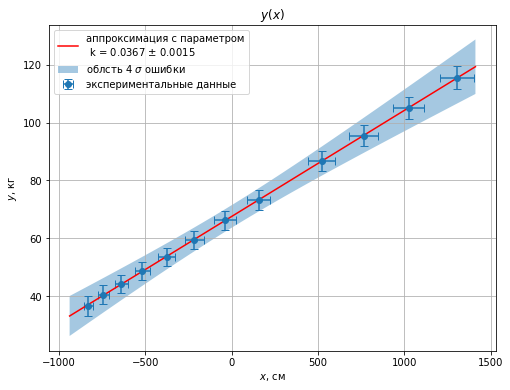

In [3]:
#xi square approximation with Y-errors
%matplotlib inline
# пользовательские параметры. Переменные x, y, xerr, yerr дожны содержать данные
visApproxError = True   # рисовать ли область ошибки аппроксимации
#TODO название функции, параметры с размерностями
# function to approximate
def f(x, k, b):
    return b + k * x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True)
err = np.sqrt(np.diag(pcov))
for v, er in zip(popt, err):
    print(v,'+-',er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", xerr=xerr, yerr=yerr, label="экспериментальные данные", capsize=4, ms=6)
teorPoints = 50     
intent = 0.05   # отступ по бокам от обласи экспериментальных данных
a, b = x.min(), x.max()
X = np.linspace(a-(b-a)*intent, b+(b-a)*intent, num=teorPoints)
plt.plot(X, f(X, *popt), 'r', label=
"аппроксимация с параметром\n k = {} $\pm$ {}".format(*err_pres_formatter(popt[0], err[0])))
if visApproxError:
    nsigma = 4
    minA, maxA = lower_upper_limits(X, f, popt, err, nsigma=nsigma)
    plt.fill_between(X, minA, maxA, alpha=0.4, label=f"облсть {nsigma} $\sigma$ ошибки")

plt.grid(True)
plt.xlabel(r"$x$, см")
plt.ylabel(r"$y$, кг")
plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"opt{i}.png", dpi=200)
i+=1

In [ ]:
#simple visualization
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="experimental data")
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$y(x)$")

plt.legend()

plt.savefig(f"viz{i}.png", dpi=200)
i+=1

In [ ]:
#simple approximation without data errors


# function to approximate
def f(x, k, b):
    return b + k * x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
err = np.sqrt(np.diag(pcov))
for v, er in zip(popt, err):
    print(v, er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", xerr=xerr, yerr=yerr, label="экспериментальные данный", capsize=4, ms=6)
X = np.linspace(x.min(), x.max(), num=50)
plt.plot(X, f(X, *popt), 'r', label=
"аппроксимация с параметром\n k = {} $\pm$ {}".format(*err_pres_formatter(popt[0], err[0])))

plt.grid(True)
plt.xlabel(r"$x$, см")
plt.ylabel(r"$y$, кг")
plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"opt{i}.png", dpi=200)
i+=1